## Scikit-Learn做机器学习
---
### 1、Scikit-Learn的数据表示

>Scikit-Learn 认为数据表示最好的方法就是用数据表的形式
* **数据表(行表示一个样本，列表示一个特征)**
1. 每行数据表示每朵被观察的鸢尾花，行数表示数据集中记录的鸢尾花总数。一般情况下，会将这个矩阵的行称为样本（samples），行数记为 n_samples
2. 每列数据表示每个样本某个特征的量化值。一般情况下，会将矩阵的列称为特征（features），列数记为 n_features。
---
* **特征矩阵** 
1. 通常被简记为变量 X。它是维度为[n_samples, n_features]的二维矩阵
---
* **目标数组** 
1. 通常简记为 y，目标数组一般是一维数组，其长度就是样本总数 n_samples

In [1]:
import sklearn
sklearn.__version__

'0.19.0'

In [2]:
import seaborn as sns
iris=sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


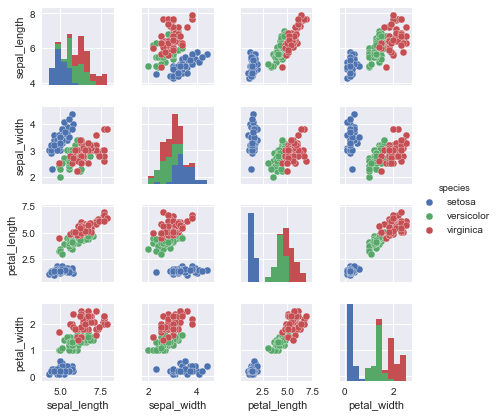

In [4]:
import matplotlib as plot
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.pairplot(iris,hue='species',size=1.5)

### 在使用 Scikit-Learn 之前，我们需要从 DataFrame 中抽取特征矩阵和目标数组

In [5]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [6]:
y_iris = iris['species']
y_iris.shape

(150,)

### Scikit-Learn的评估器API
* 统一性 所有对象使用共同接口连接一组方法和统一的文档。
* 内省 所有参数值都是公共属性。
* 限制对象层级 只有算法可以用 Python 类表示。数据集都用标准数据类型（NumPy 数组、 PandasDataFrame、 SciPy 稀疏矩阵）表示，参数名称用标准的 Python 字符串。
* 函数组合 许多机器学习任务都可以用一串基本算法实现， Scikit-Learn 尽力支持这种可能。
* 明智的默认值 当模型需要用户设置参数时， Scikit-Learn 预先定义适当的默认值。
---
>Scikit-Learn 评估器 API 的常用步骤如下所示（后面介绍的示例都是按照这些步骤进行的）。

(1) 通过从 Scikit-Learn 中导入适当的评估器类，选择模型类。

(2) 用合适的数值对模型类进行实例化，配置模型超参数（hyperparameter）。

(3) 整理数据，通过前面介绍的方法获取特征矩阵和目标数组。

(4) 调用模型实例的 fit() 方法对数据进行拟合。

(5) 对新数据应用模型：

• 在有监督学习模型中，通常使用 predict() 方法预测新数据的标签；
• 在无监督学习模型中，通常使用 transform() 或 predict() 方法转换或推断数据的性质。

### 有监督学习示例： 简单线性回归

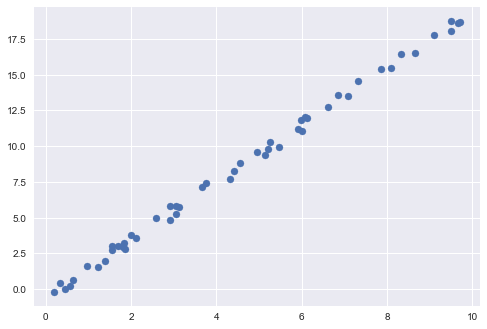

In [7]:
import matplotlib.pyplot as plt
import numpy as np


rng=np.random.RandomState(42)
x=10*rng.rand(50)
y=2*x-1+rng.rand(50)
plt.scatter(x,y)

In [8]:
#在 Scikit-Learn 中，每个模型类都是一个 Python 类

#导入线性回归模型
from sklearn.linear_model import LinearRegression

model=LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
X=x[:,np.newaxis]
X.shape

(50, 1)

In [10]:
#将数据喂给模型model
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### 在 Scikit-Learn 中，所有通过 fit() 方法获得的模型参数都带一条下划线

In [11]:
model.coef_  #斜率
model.intercept_  #截距

-0.53502757508000265

In [12]:
xfit = np.linspace(-1, 11,10)
Xfit=xfit[:,np.newaxis]
#predict预测
yfit=model.predict(Xfit)
yfit

array([ -2.54163524,   0.13384165,   2.80931853,   5.48479542,
         8.16027231,  10.83574919,  13.51122608,  16.18670297,
        18.86217985,  21.53765674])

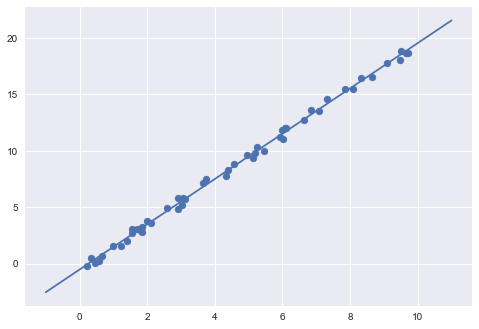

In [13]:
#根据x和y把散点图画出来
plt.scatter(x, y)
plt.plot(xfit, yfit)

### 有监督学习示例： 鸢尾花数据分类

In [14]:
#先将数据分割成训练集（training set）和测试集（testing set）
from sklearn.cross_validation import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X_iris,y_iris,random_state=1)
Xtest.shape
ytest.shape
Xtrain.shape

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


(112, 4)

In [15]:
from sklearn.naive_bayes import GaussianNB # 1.选择模型类
model = GaussianNB() # 2.初始化模型
model.fit(Xtrain, ytrain) # 3.用模型拟合数据
y_model = model.predict(Xtest) # 4.对新数据进行预测


### 最后，用 accuracy_score 工具验证模型预测结果的准确率

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,y_model)

0.97368421052631582

## 无监督学习示例： 鸢尾花数据降维
>鸢尾花数据集由四个维度构成，即每个样本都有四个维度。降维的任务是要找到一个可以保留数据本质特征的低维矩阵来表示高维数据

* PCA进行降维，将4维数据，降至2维数据

In [17]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)  #设置超参数,2表示降维成2维
model.fit(X_iris) #拟合数据，这里不用y变量
X_2D=model.transform(X_iris) #将数据转换为2维


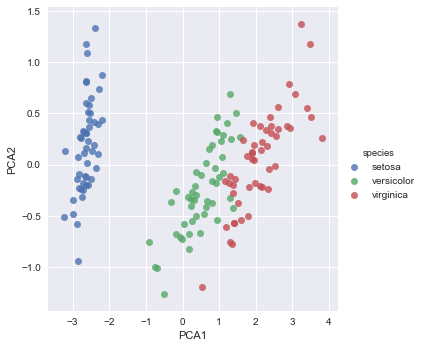

In [18]:
#现在来画出结果。快速处理方法就是先将二维数据插入到鸢尾花的 DataFrame 中，然后用Seaborn 的 lmplot 方法画图
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False)

In [19]:
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755


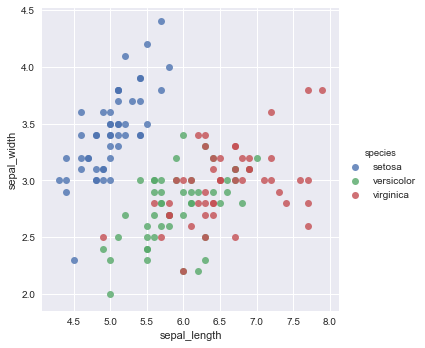

In [20]:
sns.lmplot("sepal_length", "sepal_width", hue='species', data=iris, fit_reg=False)

### 无监督学习示例： 鸢尾花数据聚类

In [21]:
#我们将用一个强大的聚类方法——高斯混合模型（Gaussian mixture model， GMM）

In [22]:
from sklearn.mixture import GaussianMixture # 1.选择模型类
model = GaussianMixture(n_components=3,
covariance_type='full') # 2.设置超参数，初始化模型
model.fit(X_iris) # 3.拟合数据，注意不需要y变量
y_gmm = model.predict(X_iris) # 4. 确定簇标签

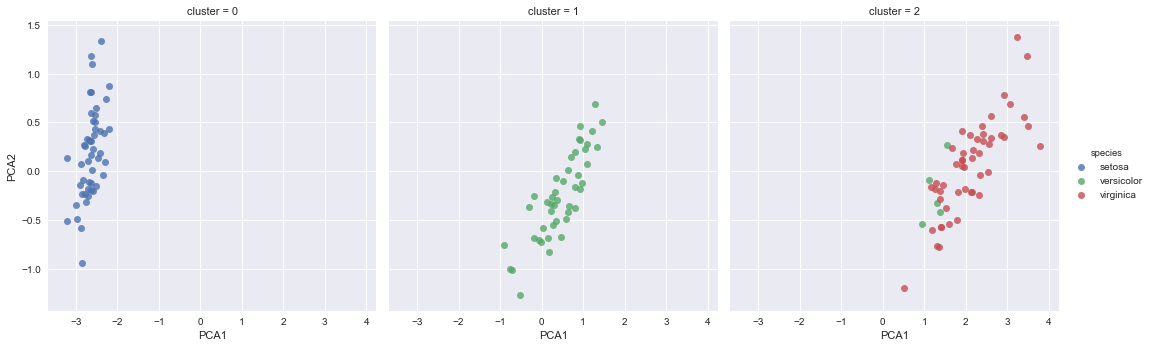

In [23]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species',col='cluster', fit_reg=False);

## 应用： 手写数字探索

In [24]:
from sklearn.datasets import load_digits  #加载数据
digits=load_digits()
digits.images.shape


(1797, 8, 8)

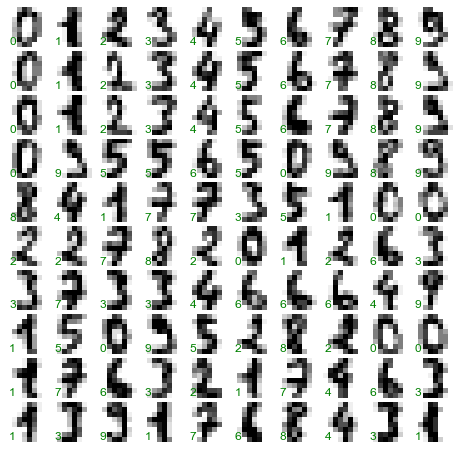

In [25]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(10,10,figsize=(8,8),subplot_kw={'xticks':[],'yticks':[]},gridspec_kw=dict(hspace=0.1,wspace=0.1))

for i,ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),transform=ax.transAxes, color='green')

In [26]:
X=digits.data
X.shape

(1797, 64)

In [27]:
y = digits.target
y.shape

(1797,)

### 无监督学习 降维
---
>上边使用了PCA降维方式，这次采用lsomap进行降维

In [28]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

C:\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


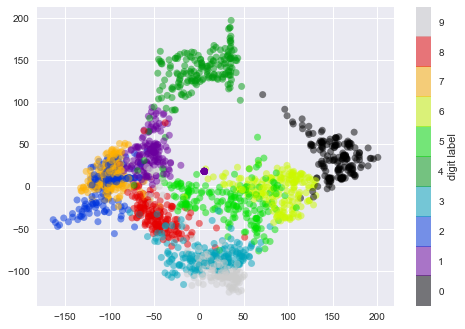

In [29]:
# 同样，将降维后的数据进行可视化
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

>这幅图呈现出了非常直观的效果，让我们知道数字在 64 维空间中的分离（可识别）程度。
例如，在参数空间中，数字 0（黑色）和数字 1（紫色）基本不会重叠。根据常识也是如
此：数字 0 是中间一片空白，而数字 1 是中间一片黑。另外，从图中会发现，数字 1 和数
字 4 好像有点儿混淆——也许是有些人写数字 1 的时候喜欢在上面加个“帽子”，因此看
起来就像是数字 4。

虽然有些瑕疵，但从总体上看，各个数字在参数空间中的分离程度还是令人满意的。这其
实告诉我们：用一个非常简单的有监督分类算法就可以完成任务。

### 数字分类

In [30]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,random_state=0)

In [31]:
#继续用高斯朴素贝叶斯模型进行拟合
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)  #使用测试数据ytest，和模型预测结果ymodel进行对比，获得模型的准确率

0.83333333333333337

### 用 Scikit-Learn 计算混淆矩阵（（confusion matrix）），然后用 Seaborn 画出来

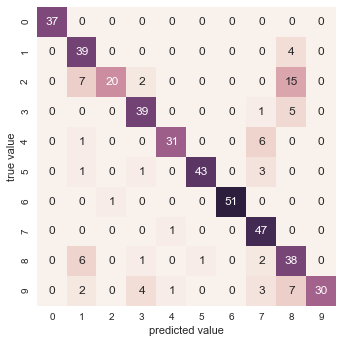

In [33]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

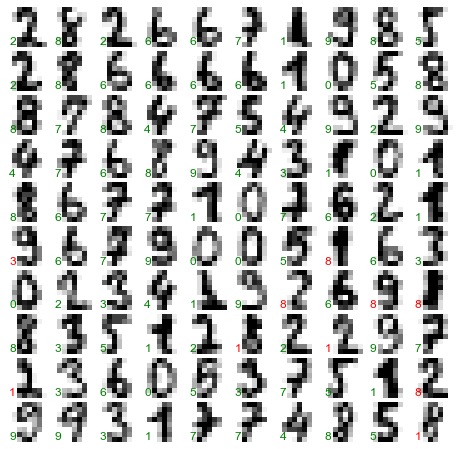

In [34]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.1, wspace=0.1))
test_images=Xtest.reshape(-1,8,8)
for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),transform=ax.transAxes,color='green' if (ytest[i] == y_model[i]) else 'red')

## 模型验证

 ### 模型验证正确方法： 留出集
 ---
 > 顾名思义，及在总的数据中，留出一部分数据，作为测试集，这部分数据在训练集中被踢出。

In [35]:
from sklearn.cross_validation import train_test_split
# 每个数据集分一半数据
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,train_size=0.5)
# 用模型拟合训练数据
model.fit(X1, y1)
# 在测试集中评估模型准确率
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.83426028921023354

### 交叉检验

In [36]:
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.84409799554565701, 0.83426028921023354)

>把数据分成五组，每一轮依次用模型拟合其中的四组数据，再预测第五组数据，评估模型准确率。手动实现这些过程会很无聊，用 Scikit-Learn 的 cross_val_score 函数可以非常简便地实现

In [37]:
from sklearn.cross_validation import cross_val_score
cross_val_score(model,X,y,cv=5)  #cv为5份，进行交叉检验

array([ 0.78296703,  0.78176796,  0.79387187,  0.86554622,  0.8084507 ])

In [38]:
from sklearn.cross_validation import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut(len(X)))
scores

array([ 1.,  1.,  0., ...,  1.,  1.,  1.])

In [39]:
#计算所有试验准确率的均值就可以得到模型的预测准确性
scores.mean()

0.84084585420144686

## 选择最优模型

>如何选择模型和超参数

>“**最优模型**”的问题基本可以看成是找出偏差与方差平衡点的问题

* Scikit-Learn验证曲线

In [40]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),LinearRegression(**kwargs))

In [41]:
#现在来创造一些数据给模型拟合：
import numpy as np
def make_data(N, err=1.0, rseed=1):
# 随机轴样数据
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y
X, y = make_data(40)

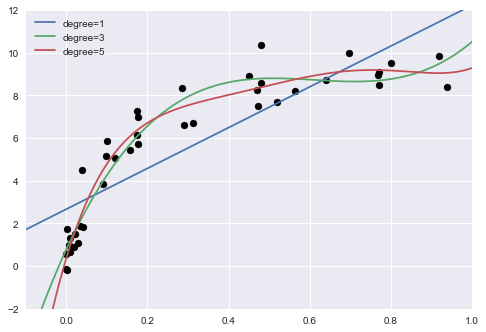

In [42]:
#通过数据可视化，将不同次数的多项式拟合曲线画出来
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # 设置图形样式
X_test = np.linspace(-0.1, 1.1, 500)[:, None]
plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
    plt.xlim(-0.1, 1.0)
    plt.ylim(-2, 12)
    plt.legend(loc='best')

C:\Anaconda3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


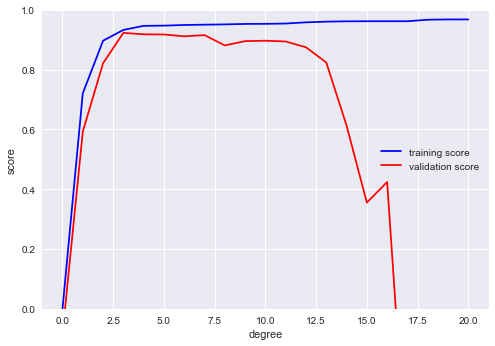

In [43]:
from sklearn.learning_curve import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
'polynomialfeatures__degree',degree, cv=7)  #只要提供模型、数据、参数名称和验证范围信息，函数就会自动计算验证范围内的训练得分和验证得分
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score')

## 学习曲线

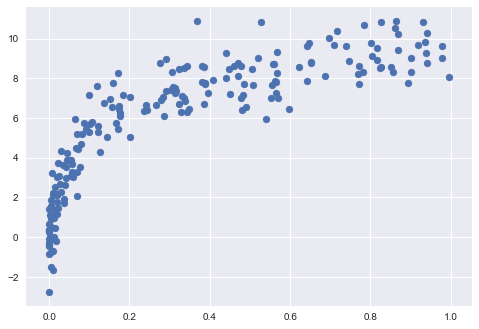

In [44]:
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2);

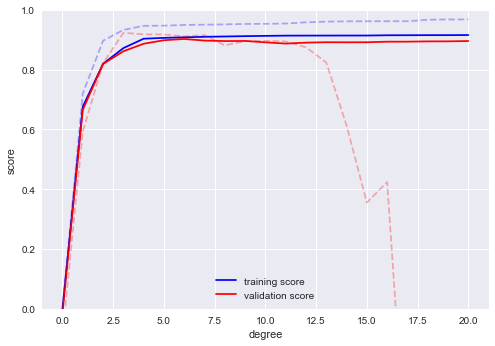

In [45]:
degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2,
'polynomialfeatures__degree',
degree, cv=7)
plt.plot(degree, np.median(train_score2, 1), color='blue',
label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3,
linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3,
linestyle='dashed')
plt.legend(loc='lower center')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

> 反映训练集规模的训练得分 / 验证得分曲线被称为学习曲线（learning curve）

### 学习曲线的特征包括以下三点。
* 特定复杂度的模型对较小的数据集容易过拟合：此时训练得分较高，验证得分较低。

* 特定复杂度的模型对较大的数据集容易欠拟合：随着数据的增大，训练得分会不断降低，
而验证得分会不断升高。
* 模型的验证集得分永远不会高于训练集得分：两条曲线一直在靠近，但永远不会交叉。

### Scikit-Learn学习曲线


In [ ]:
from sklearn.learning_curve import learning_curve

fig, ax=plt.subplot(1,2,figsize=(16,6))

fig.subplots_adjust(left=0.0625,right=0.95,wspace=0.1)

for i,degree in enumerate([2,9]):   #enumerate为枚举类型
    N,train_lc,val_lc=learning_curve(PolynomialRegression(degree),X,y)
    

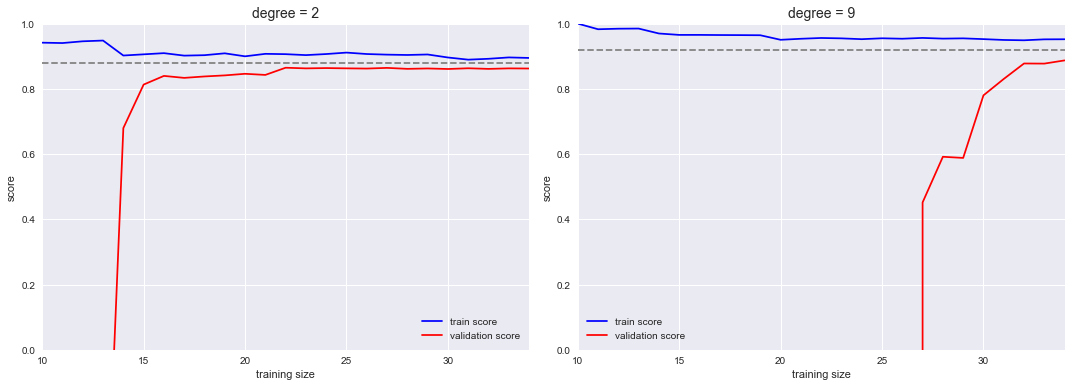

In [53]:
from sklearn.learning_curve import learning_curve

fig, ax=plt.subplots(1,2,figsize=(16,6))

fig.subplots_adjust(left=0.0625,right=0.95,wspace=0.1)

for i,degree in enumerate([2,9]):   #enumerate为枚举类型
    N,train_lc,val_lc=learning_curve(PolynomialRegression(degree),X,y,cv=7,train_sizes=np.linspace(0.3,1,25))
    ax[i].plot(N,np.mean(train_lc,1),color='blue',label='train score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1], color='gray',
    linestyle='dashed')
    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

### 验证实践：网格搜索

>在模型特征的三维网格中寻找最优值——包括多项式的次数的搜索范围、回归模型是否拟合截距，以及回归模型是否需要进行标准化处理

In [59]:
from sklearn.grid_search import GridSearchCV

#用 Scikit-Learn 的 GridSearchCV 元评估器来设置这些参数：
param_grid = {'polynomialfeatures__degree': np.arange(21),'linearregression__fit_intercept': [True, False],'linearregression__normalize': [True, False]}
grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [61]:
#调用 fit()方法在每个网格点上拟合模型，并同时记录每个点的得分
grid.fit(X, y)

GridSearchCV(cv=7, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'polynomialfeatures__degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20]), 'linearregression__fit_intercept': [True, False], 'linearregression__normalize': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [62]:
#模型拟合完成了，这样就可以获取最优参数了：
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

C:\Anaconda3\lib\site-packages\matplotlib\pyplot.py:3315: MatplotlibDeprecationWarning: The 'hold' keyword argument is deprecated since 2.0.
  mplDeprecation)


(-0.055501062186377889,
 0.9930315542825876,
 -0.74369482718170177,
 10.915746507848837)

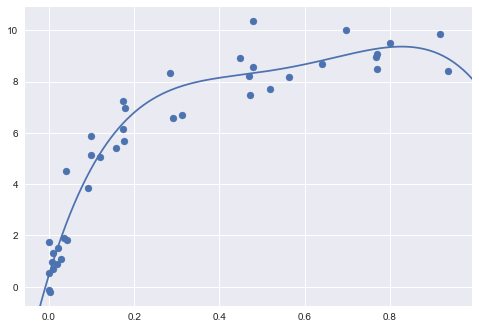

In [63]:
#可以用最优参数的模型拟合数据，并画图显示
model = grid.best_estimator_
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test, hold=True)
plt.axis(lim)